## Demo Bunka

Bunka is a class that inherits from different subclasses that carry out diverse machine learning and Natural Language Processing operatioons

In [1]:
import sys
sys.path.append("../../bunkatech")

In [2]:
import pandas as pd
from bunkatech import Bunka
import warnings
warnings.filterwarnings('ignore')
 
    
data = pd.read_csv('../data/imdb.csv', index_col = [0])
data = data.sample(2000, random_state = 42)

###  Instantiate the BasicSemantics class

In [3]:
bunka = Bunka(data = data,
                text_var = 'description',
                index_var = 'imdb',
                extract_terms=True,
                terms_embedding=False,
                docs_embedding=False,
                sample_size_terms=2000,
                terms_limit=2000,
                terms_ents=False,
                terms_ngrams=(2, 2),
                terms_ncs=False,
                terms_include_pos=["NOUN", "PROPN", "ADJ"],
                terms_include_types=["PERSON", "ORG"],
                terms_embedding_model="all-MiniLM-L6-v2",
                docs_embedding_model="all-MiniLM-L6-v2",
                language="en",
                terms_path=None,
                docs_dimension_reduction = 5,
                terms_embeddings_path=None,
                docs_embeddings_path=None,
                docs_multiprocessing = True,
                terms_multiprocessing = True)

  0%|                                                                                 | 0/1991 [00:00<?, ?it/s]2023-04-27 11:45:50,423 - INFO : loaded 'en_core_web_sm' spaCy language pipeline
2023-04-27 11:45:50,429 - INFO : loaded 'en_core_web_sm' spaCy language pipeline
2023-04-27 11:45:50,432 - INFO : loaded 'en_core_web_sm' spaCy language pipeline
2023-04-27 11:45:50,435 - INFO : loaded 'en_core_web_sm' spaCy language pipeline
2023-04-27 11:45:50,432 - INFO : loaded 'en_core_web_sm' spaCy language pipeline
2023-04-27 11:45:50,435 - INFO : loaded 'en_core_web_sm' spaCy language pipeline
2023-04-27 11:45:50,435 - INFO : loaded 'en_core_web_sm' spaCy language pipeline
2023-04-27 11:45:50,436 - INFO : loaded 'en_core_web_sm' spaCy language pipeline
100%|█████████████████████████████████████████████████████████████████████| 1991/1991 [00:08<00:00, 242.63it/s]


#### Fit the class

For multilangue embedding, **distiluse-base-multilingual-cased-v1** is the best to use. For only english, you may use **all-MiniLM-L6-v2**

#### Display the results

In [5]:
terms = bunka.terms # Display extracted terms
#terms_embeddings = bunka.terms_embeddings # Display terms embeddings
#docs_embeddings = bunka.docs_embeddings # Display docs embeddings

#### Draw networks

In [ ]:
fig = bunka.fit_draw(
            variables=["main form"],
            top_n=200,
            global_filter=0.2,
            n_neighbours=6,
            method="node2vec",
            n_cluster=10,
            bin_number=30,
            black_hole_force=1,
            color="community",
            size="size",
            symbol="entity",
            textfont_size=9,
            edge_size=1,
            height=1500,
            width=1500,
            template="plotly_white",
        )

fig.show()

In [24]:
# If you wish to export the .html fig
import plotly
plotly.offline.plot(fig, filename = 'fig.html', auto_open=True)

'fig.html'

In [7]:
terms.head(5)

,lemma,count_terms,text,main form,ent
0,new york,57,New York,new york,NaN
1,young man,45,young man | young men,young man,NaN
2,young woman,40,younger woman | young woman | young women,young woman,NaN
3,york city,33,York City,york city,NaN
4,good friend,29,best friend | best friends,best friend,NaN


In [8]:
terms_embeddings.head(5)

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
new york,0.086363,-0.019883,0.071494,0.048815,-0.033144,-0.001401,0.008352,-0.057807,-0.017513,-0.039793,...,0.017531,0.031692,-0.016117,0.021929,-0.076663,0.041794,0.103244,-0.045446,-0.027529,0.035334
young man,-0.054424,0.102381,-0.016731,-0.009139,0.017711,-0.023019,0.142750,-0.012219,0.006698,0.027264,...,0.145699,-0.039291,-0.015133,0.067595,0.000700,-0.006800,0.139238,-0.026916,0.015822,0.022758
young woman,-0.035009,0.024305,-0.004279,0.007209,-0.012090,0.017953,0.071988,0.025450,0.023999,0.037704,...,0.005457,0.021963,0.012094,0.018253,0.003366,0.097345,0.064532,-0.000051,0.076264,0.005071
york city,0.075048,0.030160,0.041267,0.049191,-0.044017,0.016805,0.041382,-0.028511,-0.046098,-0.010233,...,0.009820,-0.019376,-0.018168,0.007974,-0.086875,0.037915,0.106390,-0.024629,-0.020410,0.048810
best friend,-0.128368,0.077111,0.033445,-0.043632,0.011336,-0.026740,0.085022,0.139916,-0.011521,0.022746,...,0.035195,-0.043817,-0.054759,0.016440,0.040268,-0.010632,0.113419,0.062290,-0.060212,0.090107


In [9]:
docs_embeddings.head(5)

,0,1,2,3,4
imdb,,,,,
tt0205177,8.419321,13.831893,15.478493,5.841931,1.951918
tt2316801,8.756722,12.631425,16.076677,6.458174,2.629080
tt0465234,7.959995,11.802996,15.947361,4.016066,1.322388
tt1846589,7.487865,11.185894,16.351059,4.431986,2.305148
tt0824758,8.417170,11.802746,15.103798,6.519677,2.550747


#### Origami projection

2022-11-18 17:15:02,437 - INFO : Load pretrained SentenceTransformer: all-MiniLM-L6-v2
2022-11-18 17:15:02,645 - INFO : Use pytorch device: cpu
Batches: 100%|█████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 84.40it/s]


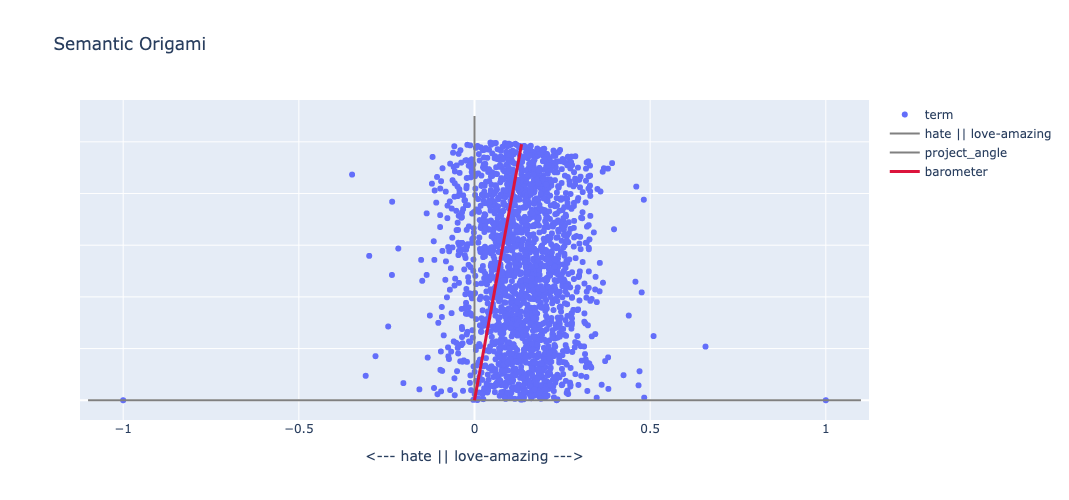

In [11]:
fig = bunka.origami_projection_unique(
                    left_axis= ['love', 'amazing'],
                    right_axis = ['hate'],
                    height=500,
                    width=1000,
                    type="terms",
                    dispersion=True,
                    barometer=True,
                    explainer = True
    
                )
fig.show()

### Display Nexted Topics

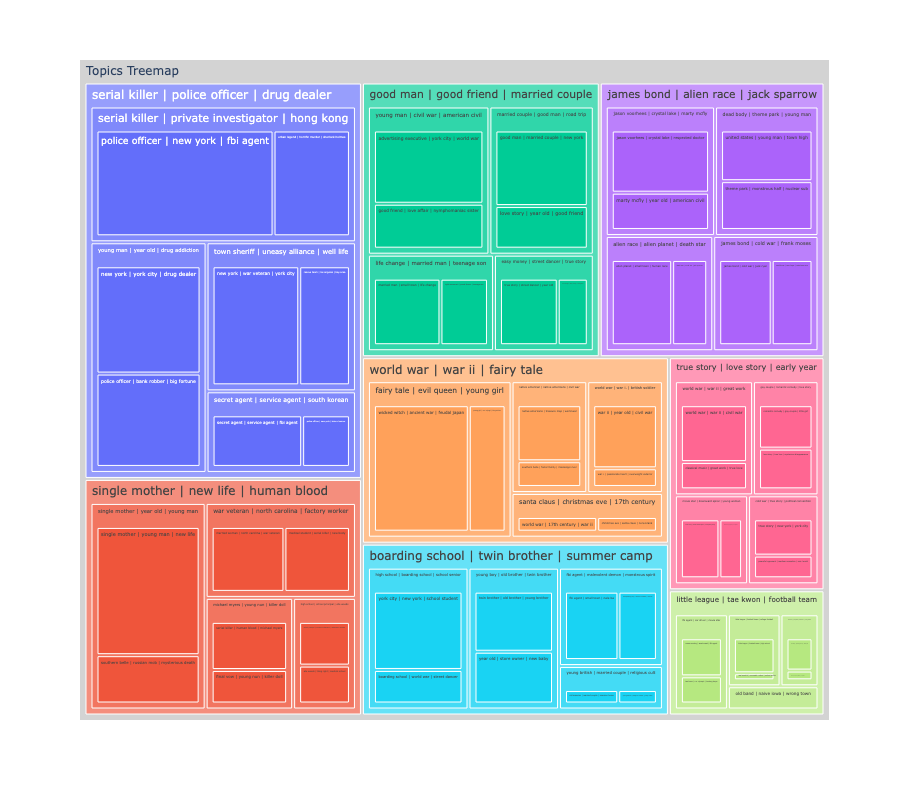

In [14]:
fig_nested = bunka.nested_maps(
        size_rule="docs_size",
        map_type="treemap", # Try sunburst
        width=800,
        height=800,
        query=None) # You can query the map with an exact query

fig_nested.show()